In [1]:
#@title Everything in Part 1 copied over

!pip install -U -q PyDrive
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from collections import defaultdict

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import Adam, RMSprop
from keras.utils import plot_model

from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

stockData = drive.CreateFile({'id':"1Gtf_20aW4H81JRwjvdKozlF49sXpZzID"}) 
stockData.GetContentFile('stock_data.csv')
cleaned_data = pd.read_csv('stock_data.csv')
cleaned_data.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Text,Sentiment
0,kicker on my watchlist xide tit soq pnk cpw bp...,1
1,user aap movie return for the fea geed indicat...,1
2,user i d be afraid to short amzn they are look...,1
3,mnta over,1
4,oi over,1


In [2]:
X = cleaned_data['Text']
y = cleaned_data['Sentiment']

vec = CountVectorizer(max_features=4000)
X = vec.fit_transform(X).toarray()

pca = PCA(n_components=256)
X = pca.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

<h1 align="center">K-Nearest Neighbor</h1>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/e7/KnnClassification.svg/220px-KnnClassification.svg.png" align="right">


K Nearest Neighbor is easy in the fact that there is no prior training. You choose a point, you see whether your neighbors are positive or negative, and then that determines whether the point is positive or negative. The only hyper-paramter we need to consider is the K in K-nearest neighbor:

In [3]:
'''
We shall first try with 5 neighbors
'''

neighbors = 5
model = KNeighborsClassifier(n_neighbors=neighbors)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("KNN ({}) Accuracy: {}".format(neighbors,accuracy_score(y_test,y_pred)))

KNN (5) Accuracy: 0.7066436583261432


In [4]:
'''
Now we see if we can do better:
'''

neighbors = range(1,61)
res = []

for i in neighbors:
  model = KNeighborsClassifier(n_neighbors=i)
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  print("KNN ({}) Accuracy: {}".format(i,accuracy_score(y_test,y_pred)))
  res.append(accuracy_score(y_test,y_pred))

KNN (1) Accuracy: 0.6652286453839517
KNN (2) Accuracy: 0.6212251941328731
KNN (3) Accuracy: 0.7031924072476272
KNN (4) Accuracy: 0.6712683347713546
KNN (5) Accuracy: 0.7066436583261432
KNN (6) Accuracy: 0.6937014667817084
KNN (7) Accuracy: 0.725625539257981
KNN (8) Accuracy: 0.7057808455565142
KNN (9) Accuracy: 0.723037100949094
KNN (10) Accuracy: 0.7144089732528042
KNN (11) Accuracy: 0.723037100949094
KNN (12) Accuracy: 0.7118205349439172
KNN (13) Accuracy: 0.7118205349439172
KNN (14) Accuracy: 0.7057808455565142
KNN (15) Accuracy: 0.7152717860224331
KNN (16) Accuracy: 0.7100949094046591
KNN (17) Accuracy: 0.7100949094046591
KNN (18) Accuracy: 0.719585849870578
KNN (19) Accuracy: 0.7135461604831751
KNN (20) Accuracy: 0.7126833477135461
KNN (21) Accuracy: 0.7100949094046591
KNN (22) Accuracy: 0.7135461604831751
KNN (23) Accuracy: 0.7100949094046591
KNN (24) Accuracy: 0.7100949094046591
KNN (25) Accuracy: 0.7100949094046591
KNN (26) Accuracy: 0.7092320966350302
KNN (27) Accuracy: 0.7161

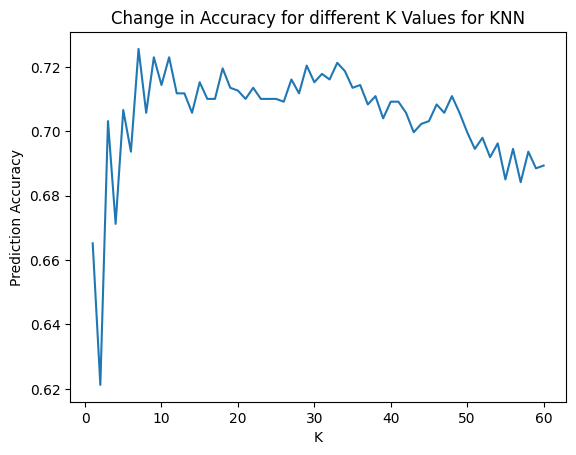

In [5]:
'''
Plotting the error over the different K's
'''
plt.title('Change in Accuracy for different K Values for KNN')
plt.xlabel('K')
plt.ylabel('Prediction Accuracy')
 
plt.plot(neighbors,res)

Hmmm, it seems like K is most optimal when it is around 30, since adding any more seems to underfit. Hence, from this mini-experiment, we can conclude that at $K=30$, we obtain the optimal KNN model for sentiment analysis classification.